In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(plotly)
library(RColorBrewer)
library(ape)
library(nlme)
library(reshape2)
library(tidyr)

### Prepare data for Mantel test and plotting

In [71]:
#Read in ultrametric tree, transform matrix to columns, rename columns
brlen.matrix = read.csv("~/Microbiome_29_ML_constrained_Patristic.csv")
brlen.mdf = melt(brlen.matrix)
colnames(brlen.mdf)[1] <- "Host_A"
colnames(brlen.mdf)[2] <- "Host_B"
colnames(brlen.mdf)[3] <- "pdist"
brlen2 = mutate(brlen.mdf, Host_Pair = paste(Host_A, Host_B, sep = '|'))
brlen3 = select(brlen2, Host_Pair, pdist)
brlen3[is.na(brlen3)] <- 0

Using X as id variables


In [107]:
#Read in host IDs and wuf bdiv data

batfecal_ID = read.csv("~/fecal_IDs_update.csv")
batoral_ID = read.csv("~/oral_IDs_update.csv")
batskin_ID = read.csv("~/skin_IDs_update.csv")

#Weighted UniFrac
fecal_wuf = readRDS("~/batfecal.wt.dist.wunif.rds")
oral_wuf = readRDS("~/batoral.wt.dist.wunif.rds")
skin_wuf = readRDS("~/batskin.wt.dist.wunif.rds")
fecal_wuf.df = melt(as.matrix(fecal_wuf))
oral_wuf.df = melt(as.matrix(oral_wuf))
skin_wuf.df = melt(as.matrix(skin_wuf))

#Unweighted UniFrac
#fecal_uf = readRDS("~/batfecal.wt.dist.unif.rds")
#oral_uf = readRDS("~/batoral.wt.dist.unif.rds")
#skin_uf = readRDS("~/batskin.wt.dist.unif.rds")
#fecal_uf.df = melt(as.matrix(fecal_uf))
#oral_uf.df = melt(as.matrix(oral_uf))
#skin_uf.df = melt(as.matrix(skin_uf))

#Bray-Curtis
#fecal_bc = readRDS("~/batfecal.wt.dist.bc.rds")
#oral_bc = readRDS("~/batoral.wt.dist.bc.rds")
#skin_bc = readRDS("~/batskin.wt.dist.bc.rds")
#fecal_bc.df = melt(as.matrix(fecal_bc))
#oral_bc.df = melt(as.matrix(oral_bc))
#skin_bc.df = melt(as.matrix(skin_bc))

#Rename columns

#wuf

colnames(fecal_wuf.df)[1] <- "Host_A"
colnames(fecal_wuf.df)[2] <- "Host_B"
colnames(fecal_wuf.df)[3] <- "wuf"

colnames(oral_wuf.df)[1] <- "Host_A"
colnames(oral_wuf.df)[2] <- "Host_B"
colnames(oral_wuf.df)[3] <- "wuf"

colnames(skin_wuf.df)[1] <- "Host_A"
colnames(skin_wuf.df)[2] <- "Host_B"
colnames(skin_wuf.df)[3] <- "wuf"

#uf

#colnames(fecal_uf.df)[1] <- "Host_A"
#colnames(fecal_uf.df)[2] <- "Host_B"
#colnames(fecal_uf.df)[3] <- "uf"

#colnames(oral_uf.df)[1] <- "Host_A"
#colnames(oral_uf.df)[2] <- "Host_B"
#colnames(oral_uf.df)[3] <- "uf"

#colnames(skin_uf.df)[1] <- "Host_A"
#colnames(skin_uf.df)[2] <- "Host_B"
#colnames(skin_uf.df)[3] <- "uf"

#bc

#colnames(fecal_bc.df)[1] <- "Host_A"
#colnames(fecal_bc.df)[2] <- "Host_B"
#colnames(fecal_bc.df)[3] <- "bc"

#colnames(oral_bc.df)[1] <- "Host_A"
#colnames(oral_bc.df)[2] <- "Host_B"
#colnames(oral_bc.df)[3] <- "bc"

#colnames(skin_bc.df)[1] <- "Host_A"
#colnames(skin_bc.df)[2] <- "Host_B"
#colnames(skin_bc.df)[3] <- "bc"

#Replace SampleIDs with Host_name

fecal_wuf.df$Host_A <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_A, batfecal_ID$Sample)]
oral_wuf.df$Host_A <- batoral_ID$Host_names[match(oral_wuf.df$Host_A, batoral_ID$Sample)]
skin_wuf.df$Host_A <- batskin_ID$Host_names[match(skin_wuf.df$Host_A, batskin_ID$Sample)]

#fecal_uf.df$Host_A <- batfecal_ID$Host_names[match(fecal_uf.df$Host_A, batfecal_ID$Sample)]
#oral_uf.df$Host_A <- batoral_ID$Host_names[match(oral_uf.df$Host_A, batoral_ID$Sample)]
#skin_uf.df$Host_A <- batskin_ID$Host_names[match(skin_uf.df$Host_A, batskin_ID$Sample)]

#fecal_bc.df$Host_A <- batfecal_ID$Host_names[match(fecal_bc.df$Host_A, batfecal_ID$Sample)]
#oral_bc.df$Host_A <- batoral_ID$Host_names[match(oral_bc.df$Host_A, batoral_ID$Sample)]
#skin_bc.df$Host_A <- batskin_ID$Host_names[match(skin_bc.df$Host_A, batskin_ID$Sample)]

fecal_wuf.df$Host_B <- batfecal_ID$Host_names[match(fecal_wuf.df$Host_B, batfecal_ID$Sample)]
oral_wuf.df$Host_B <- batoral_ID$Host_names[match(oral_wuf.df$Host_B, batoral_ID$Sample)]
skin_wuf.df$Host_B <- batskin_ID$Host_names[match(skin_wuf.df$Host_B, batskin_ID$Sample)]

#fecal_uf.df$Host_B <- batfecal_ID$Host_names[match(fecal_uf.df$Host_B, batfecal_ID$Sample)]
#oral_uf.df$Host_B <- batoral_ID$Host_names[match(oral_uf.df$Host_B, batoral_ID$Sample)]
#skin_uf.df$Host_B <- batskin_ID$Host_names[match(skin_uf.df$Host_B, batskin_ID$Sample)]

#fecal_bc.df$Host_B <- batfecal_ID$Host_names[match(fecal_bc.df$Host_B, batfecal_ID$Sample)]
#oral_bc.df$Host_B <- batoral_ID$Host_names[match(oral_bc.df$Host_B, batoral_ID$Sample)]
#skin_bc.df$Host_B <- batskin_ID$Host_names[match(skin_bc.df$Host_B, batskin_ID$Sample)]

#Create new column concatening names for pairwise comps
#wuf
fecal.wuf = mutate(fecal_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
oral.wuf = mutate(oral_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
skin.wuf = mutate(skin_wuf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))

fecal.wuf = select(fecal.wuf, Host_Pair, wuf)
oral.wuf = select(oral.wuf, Host_Pair, wuf)
skin.wuf = select(skin.wuf, Host_Pair, wuf)

#uf

#fecal.uf = mutate(fecal_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
#oral.uf = mutate(oral_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
#skin.uf = mutate(skin_uf.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))

#fecal.uf = select(fecal.uf, Host_Pair, uf)
#oral.uf = select(oral.uf, Host_Pair, uf)
#skin.uf = select(skin.uf, Host_Pair, uf)

#bc

#fecal.bc = mutate(fecal_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
#oral.bc = mutate(oral_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))
#skin.bc = mutate(skin_bc.df, Host_Pair = paste(Host_A, Host_B, sep = '|'))

#fecal.bc = select(fecal.bc, Host_Pair, bc)
#oral.bc = select(oral.bc, Host_Pair, bc)
#skin.bc = select(skin.bc, Host_Pair, bc)

#### Prepare data for Mantels tests and plotting

In [109]:
####################################
# These are the data for plotting: #
####################################

fecal_wuf.brlen = left_join(fecal.wuf,brlen3)
fecal_wuf.brlen = na.omit(fecal_wuf.brlen)
oral_wuf.brlen = left_join(oral.wuf,brlen3)
oral_wuf.brlen = na.omit(oral_wuf.brlen)
skin_wuf.brlen = left_join(skin.wuf,brlen3)
skin_wuf.brlen = na.omit(skin_wuf.brlen)

#write.csv(fecal_wuf.brlen, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/mSystems_MantelTests/fecal_wuf.pdist.df.csv")
#write.csv(oral_wuf.brlen, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/mSystems_MantelTests/oral_wuf.pdist.df.csv")
#write.csv(skin_wuf.brlen, "/gpfs/data/gilbert-lab/Lutz/Batmicrobiome/mSystems_MantelTests/skin_wuf.pdist.df.csv")

########################################
# These are the data for Mantels Tests #
########################################

#Separate into two columns for plotting

fecal_wuf.brlen = separate(data = fecal_wuf.brlen, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "\\|")
oral_wuf.brlen = separate(data = oral_wuf.brlen, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "\\|")
skin_wuf.brlen = separate(data = skin_wuf.brlen, col = Host_Pair, into = c("Host_A", "Host_B"), sep = "\\|")

fecal.pdist.wf = fecal_wuf.brlen %>% select(Host_A,Host_B,pdist)
fecal.pdist.wf = acast(fecal.pdist.wf, Host_A~Host_B, value.var="pdist", fun.aggregate=mean)
fecal.wf = fecal_wuf.brlen %>% select(Host_A,Host_B,wuf)
fecal.wf = acast(fecal.wf, Host_A~Host_B, value.var='wuf', fun.aggregate=mean)

oral.pdist.wf = oral_wuf.brlen %>% select(Host_A,Host_B,pdist)
oral.pdist.wf = acast(oral.pdist.wf, Host_A~Host_B, value.var="pdist", fun.aggregate=mean)
oral.wf = oral_wuf.brlen %>% select(Host_A,Host_B,wuf)
oral.wf = acast(oral.wf, Host_A~Host_B, value.var='wuf', fun.aggregate=mean)

skin.pdist.wf = skin_wuf.brlen %>% select(Host_A,Host_B,pdist)
skin.pdist.wf = acast(skin.pdist.wf, Host_A~Host_B, value.var="pdist", fun.aggregate=mean)
skin.wf = skin_wuf.brlen %>% select(Host_A,Host_B,wuf) 
skin.wf = acast(skin.wf, Host_A~Host_B, value.var='wuf', fun.aggregate=mean)

Joining, by = "Host_Pair"
Joining, by = "Host_Pair"
Joining, by = "Host_Pair"


In [110]:
#Fecal Mantel
fecal.wuf.mantel = mantel(fecal.wf, fecal.pdist.wf, method="pearson", permutations=10000)
fecal.wuf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = fecal.wf, ydis = fecal.pdist.wf, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.1237 
      Significance: 0.15298 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.160 0.213 0.259 0.309 
Permutation: free
Number of permutations: 10000


In [111]:
#Oral Mantel
oral.wuf.mantel = mantel(oral.wf, oral.pdist.wf, method="pearson", permutations=10000)
oral.wuf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = oral.wf, ydis = oral.pdist.wf, method = "pearson",      permutations = 10000) 

Mantel statistic r: -0.07152 
      Significance: 0.70623 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.164 0.213 0.261 0.310 
Permutation: free
Number of permutations: 10000


In [112]:
#Skin Mantel
skin.wuf.mantel = mantel(skin.wf, skin.pdist.wf, method="pearson", permutations=10000)
skin.wuf.mantel


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = skin.wf, ydis = skin.pdist.wf, method = "pearson",      permutations = 10000) 

Mantel statistic r: 0.04297 
      Significance: 0.30187 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.142 0.189 0.226 0.277 
Permutation: free
Number of permutations: 10000


### PLOTS

##### Plot Host Phylogenetic divergence by microbial dissimilarity

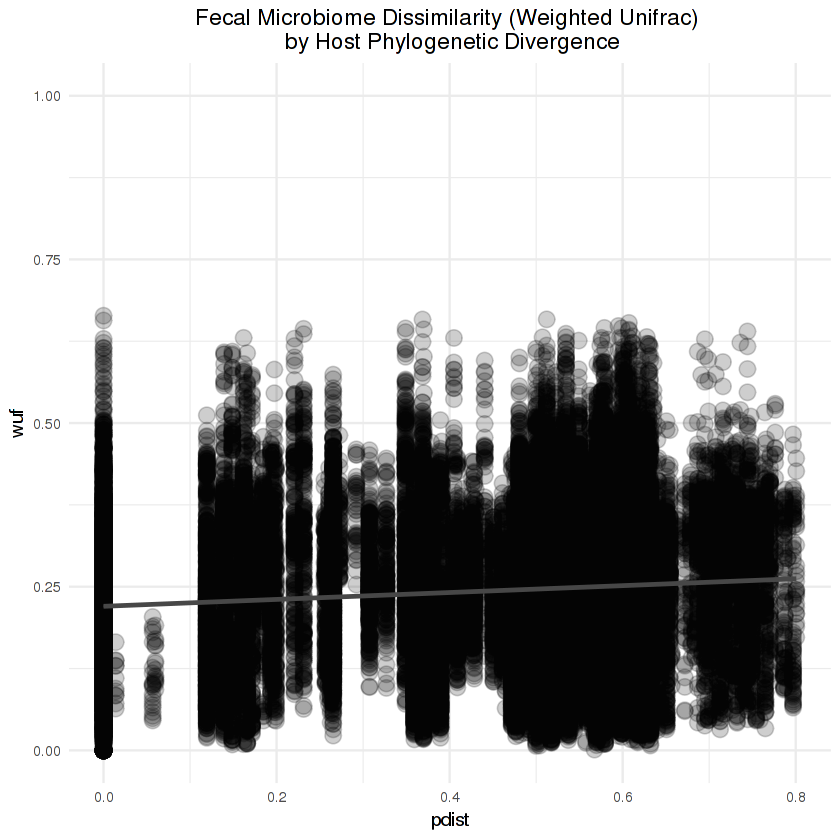

In [97]:
p = ggplot(fecal_wuf.brlen, aes(x=pdist, y=wuf)) + 
    geom_point(alpha=0.1, size=4) +
    ggtitle("Fecal Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

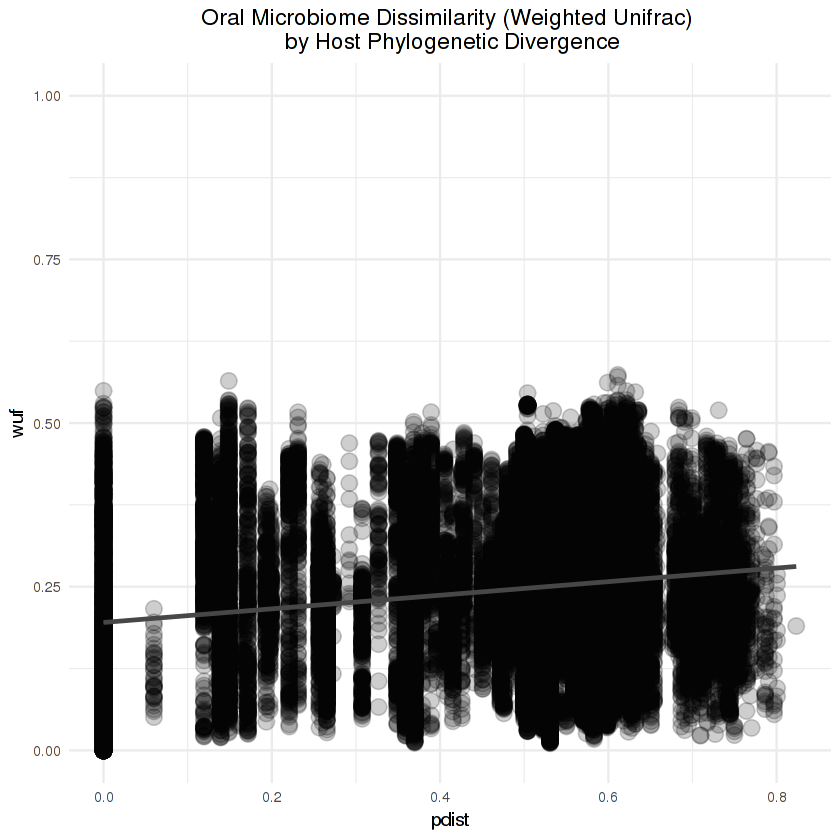

In [98]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(oral_wuf.brlen, aes(x=pdist, y=wuf)) + 
    geom_point(alpha=0.1, size=4) +
    ggtitle("Oral Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

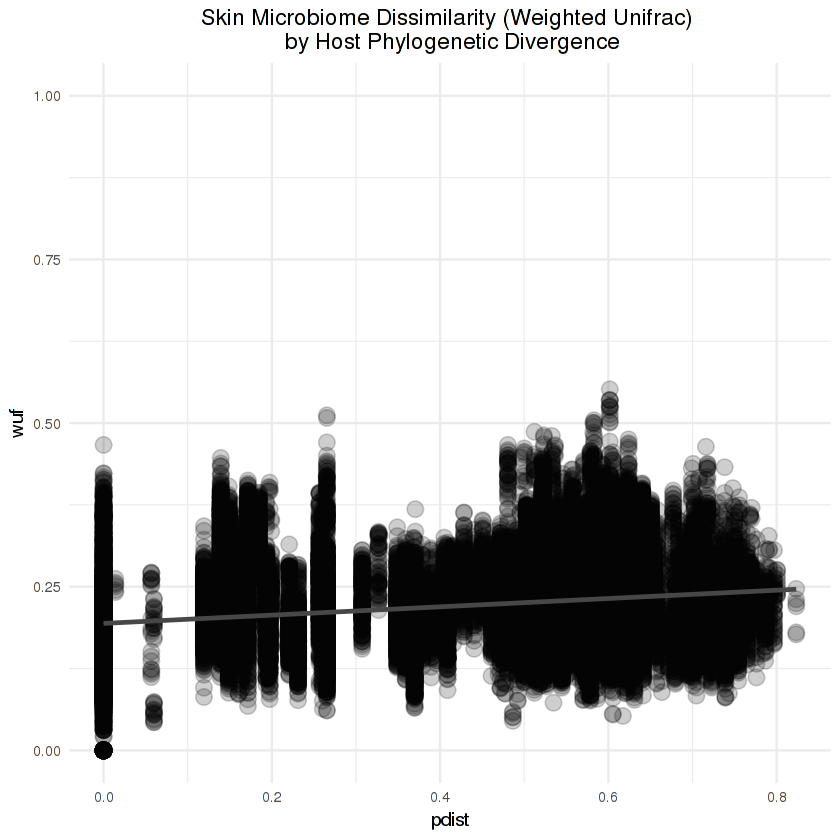

In [100]:
#Plot Host Phylogenetic divergence by microbial dissimilarity

p = ggplot(skin_wuf.brlen, aes(x=pdist, y=wuf)) + 
    geom_point(alpha=0.1, size=4) +
    ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28")#, se=TRUE, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

#### Get mean pairwise bdiv values and plot

In [125]:
#Get mean wuf values and join with p-dist
fecal_wuf.mean = fecal.wuf %>% group_by(Host_Pair) %>% summarize(m = mean(wuf))
fecal_wuf.brlen = left_join(brlen3,fecal_wuf.mean, by="Host_Pair")
fecal_wuf.brlen = na.omit(fecal_wuf.brlen)

oral_wuf.mean = oral.wuf %>% group_by(Host_Pair) %>% summarize(m = mean(wuf))
oral_wuf.brlen = left_join(brlen3,oral_wuf.mean, by="Host_Pair")
oral_wuf.brlen = na.omit(oral_wuf.brlen)

skin_wuf.mean = skin.wuf %>% group_by(Host_Pair) %>% summarize(m = mean(wuf))
skin_wuf.brlen = left_join(brlen3,skin_wuf.mean, by="Host_Pair")
skin_wuf.brlen = na.omit(skin_wuf.brlen)

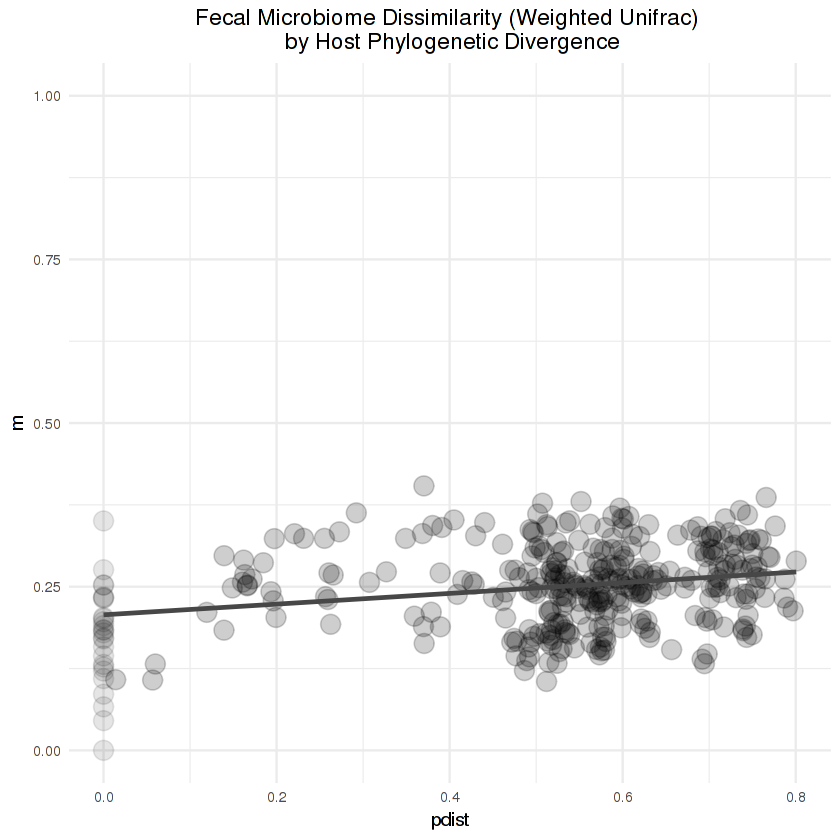

In [126]:
#Plot Host Phylogenetic divergence by MEAN microbial dissimilarity

p = ggplot(fecal_wuf.brlen, aes(x=pdist, y=m)) + 
    geom_point(alpha=0.1, size=5) +
    ggtitle("Fecal Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28", se=FALSE)#, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

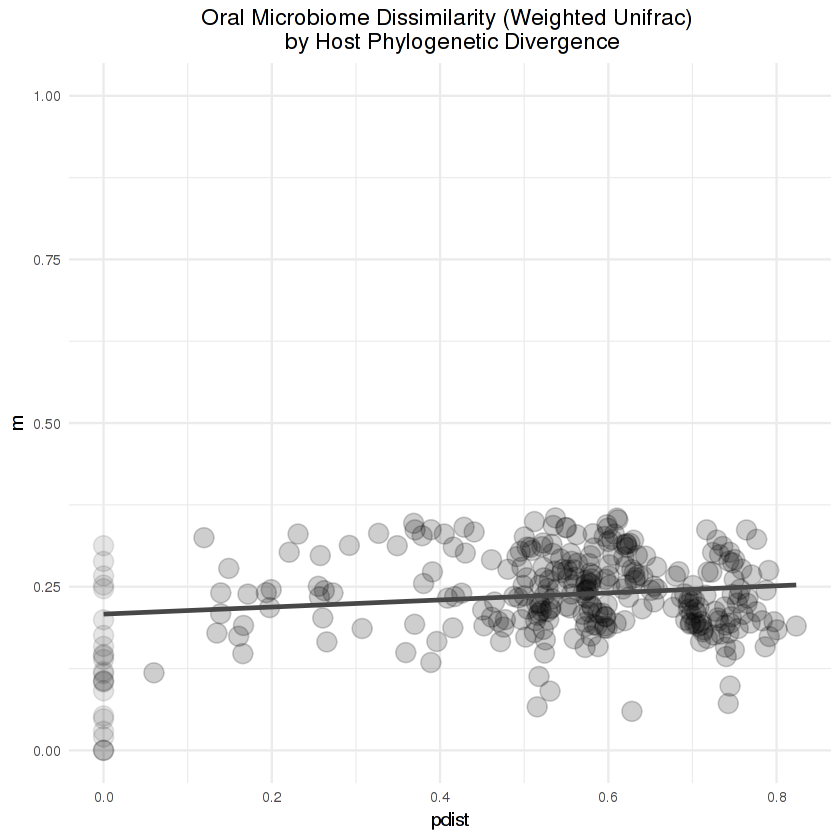

In [127]:
#Plot Host Phylogenetic divergence by MEAN microbial dissimilarity

p = ggplot(oral_wuf.brlen, aes(x=pdist, y=m)) + 
    geom_point(alpha=0.1, size=5) +
    ggtitle("Oral Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28", se=FALSE)#, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p

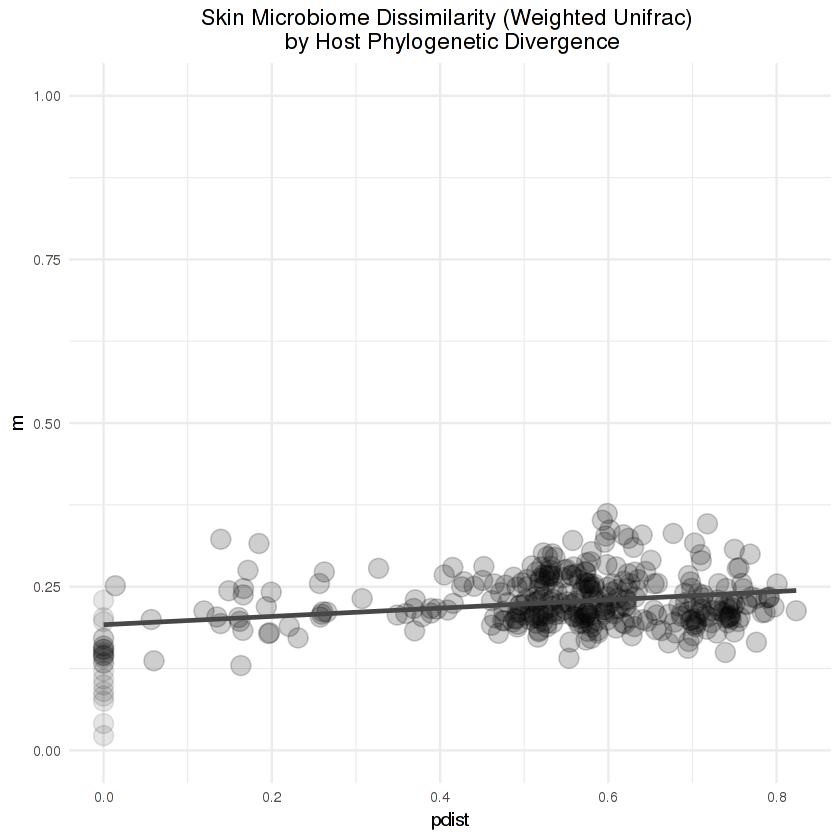

In [128]:
#Plot Host Phylogenetic divergence by MEAN microbial dissimilarity

p = ggplot(skin_wuf.brlen, aes(x=pdist, y=m)) + 
    geom_point(alpha=0.1, size=5) +
    ggtitle("Skin Microbiome Dissimilarity (Weighted Unifrac) \n by Host Phylogenetic Divergence")
p = p + geom_smooth(method = "lm", color = "grey28", se=FALSE)#, alpha=.2)
p = p + scale_y_continuous(limits=c(0,1))
p = p + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p